In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
from polyphony.dataset import load_pancreas
from polyphony import Polyphony
from polyphony.utils.visualize import display_umap

Global seed set to 0


# Data Preparation

In this example, we use the `Pancreas` dataset from the [scArches example](https://scarches.readthedocs.io/en/latest/scvi_surgery_pipeline.html). Two batches of the data (`Pancreas CelSeq2` and `Pancreas SS2`) are used as for query. And the rest makes up the reference dataset.

In [3]:
ref, query = load_pancreas()

In [4]:
ref.adata

AnnData object with n_obs × n_vars = 10294 × 1000
    obs: 'batch', 'study', 'cell_type', 'size_factors', 'source'

In [5]:
pp = Polyphony(ref, query )

# Model Building

### Step-0: setup the data

In [6]:
pp.setup_data()

INFO     Using batches from adata.obs["batch"]                                               
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 10294 cells, 1000 vars, 1 batches,
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          
INFO     Using batches from adata.obs["batch"]                                               
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 5

### Step-1: build reference model and the initial query model

In [7]:
pp.init_reference_step()

INFO     Using data from adata.X                                                             
INFO     Registered keys:['X', 'batch_indices', 'labels', 'cell_update', 'desired_rep']      
INFO     Successfully registered anndata object containing 10294 cells, 1000 vars, 3 batches,
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


2022-02-22 16:13:38.597286: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-22 16:13:39.263100: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1311/1311 [==============================] - 7s 4ms/step - loss: 0.1945
Epoch 2/10
1311/1311 [==============================] - 6s 4ms/step - loss: 0.1423
Epoch 3/10
1311/1311 [==============================] - 6s 5ms/step - loss: 0.1342
Epoch 4/10
1311/1311 [==============================] - 6s 5ms/step - loss: 0.1289
Epoch 5/10
1311/1311 [==============================] - 7s 5ms/step - loss: 0.1253
Epoch 6/10
1311/1311 [==============================] - 6s 5ms/step - loss: 0.1226
Epoch 7/10
1311/1311 [==============================] - 7s 5ms/step - loss: 0.1210
Epoch 8/10
1311/1311 [==============================] - 7s 5ms/step - loss: 0.1198
Epoch 9/10
1311/1311 [==============================] - 7s 6ms/step - loss: 0.1184
Epoch 10/10
1311/1311 [==============================] - 6s 5ms/step - loss: 0.1177


2022-02-22 16:14:44.708842: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/chengfurui/Projects/polyphony/data/ref/umap/encoder/assets
Keras encoder model saved to /Users/chengfurui/Projects/polyphony/data/ref/umap/encoder
INFO:tensorflow:Assets written to: /Users/chengfurui/Projects/polyphony/data/ref/umap/parametric_model/assets
Keras full model saved to /Users/chengfurui/Projects/polyphony/data/ref/umap/parametric_model
Pickle of ParametricUMAP model saved to /Users/chengfurui/Projects/polyphony/data/ref/umap/model.pkl
INFO     Using data from adata.X                                                             
INFO     Registered keys:['X', 'batch_indices', 'labels', 'cell_update', 'desired_rep']      
INFO     Successfully registered anndata object containing 5387 cells, 1000 vars, 5 batches, 
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


... storing 'study' as categorical
... storing 'source' as categorical


<Figure size 800x800 with 0 Axes>

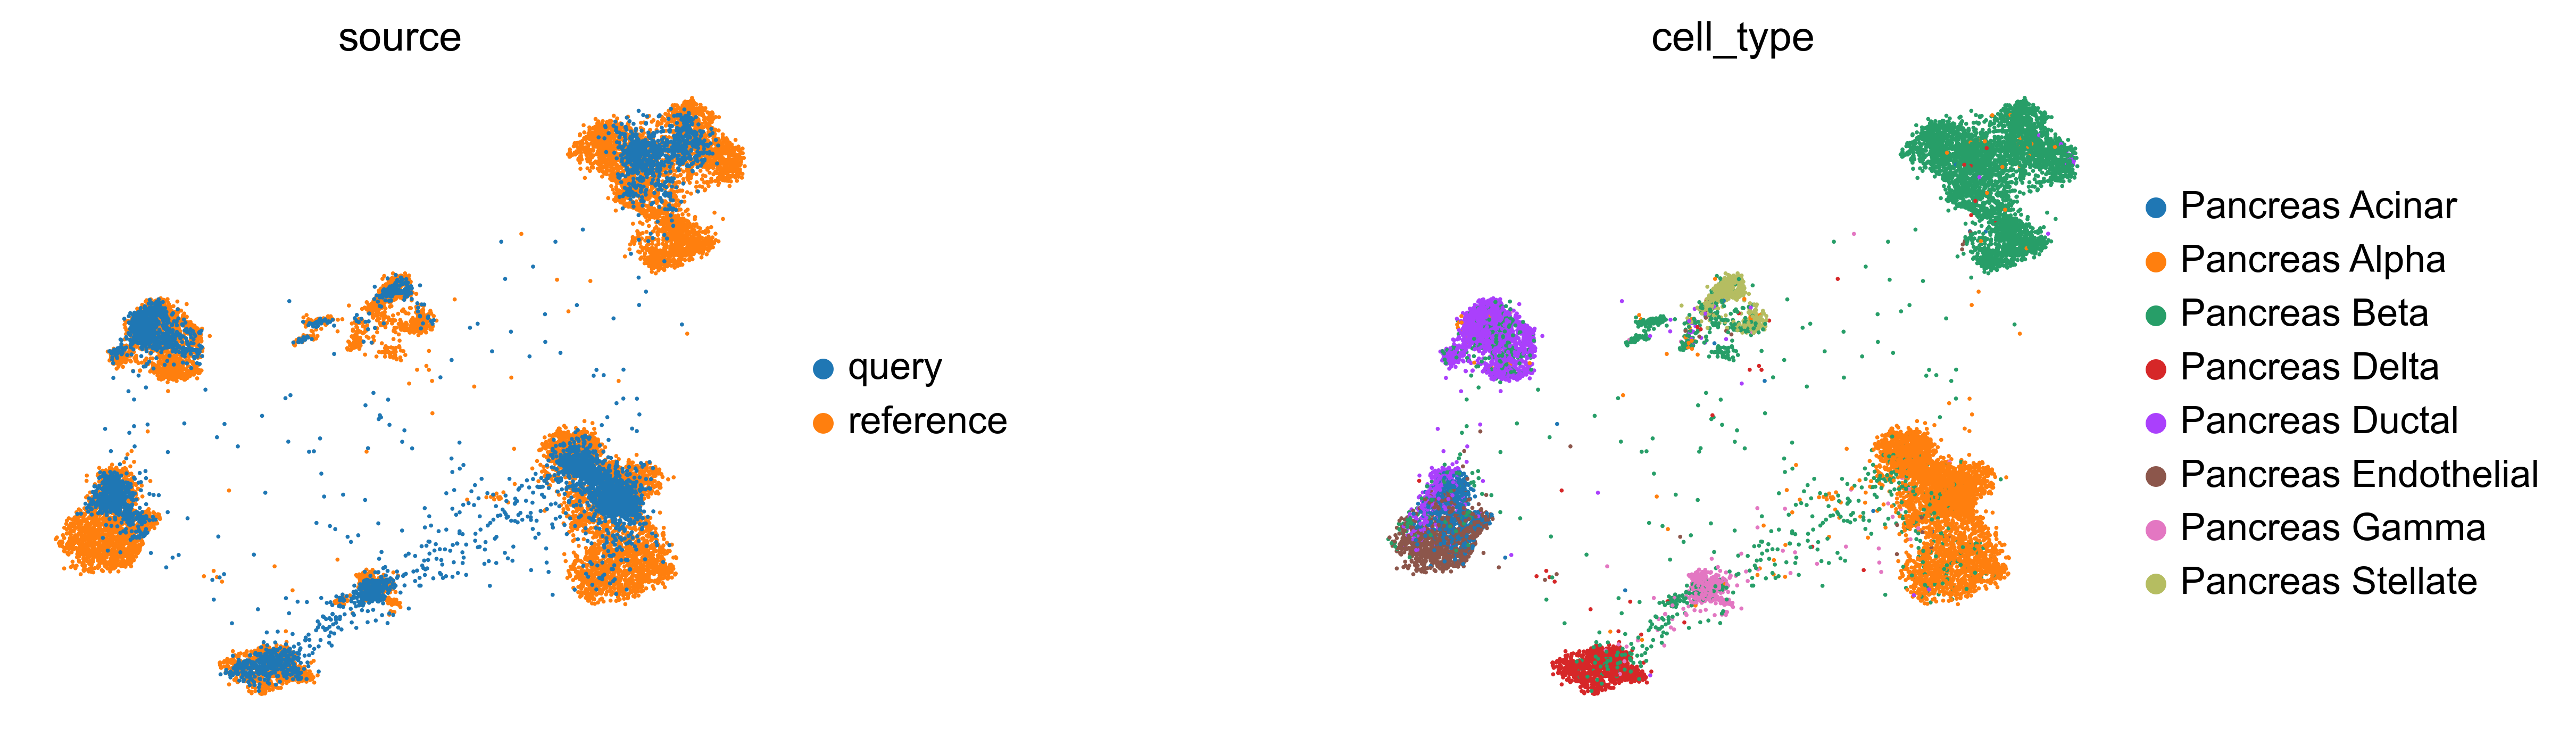

In [8]:
pp.umap_transform()
display_umap(pp.full_adata, color=["source", "cell_type"])

### Step-2: refine the query model 

In [9]:
pp.anchor_update_step()

2022-02-22 16:15:04,584 - harmonypy - INFO - Iteration 1 of 10
2022-02-22 16:15:07,613 - harmonypy - INFO - Iteration 2 of 10
2022-02-22 16:15:10,606 - harmonypy - INFO - Iteration 3 of 10
2022-02-22 16:15:13,600 - harmonypy - INFO - Iteration 4 of 10
2022-02-22 16:15:16,521 - harmonypy - INFO - Iteration 5 of 10
2022-02-22 16:15:19,559 - harmonypy - INFO - Iteration 6 of 10
2022-02-22 16:15:22,054 - harmonypy - INFO - Iteration 7 of 10
2022-02-22 16:15:24,171 - harmonypy - INFO - Iteration 8 of 10
2022-02-22 16:15:25,837 - harmonypy - INFO - Iteration 9 of 10
2022-02-22 16:15:27,220 - harmonypy - INFO - Iteration 10 of 10
2022-02-22 16:15:28,437 - harmonypy - INFO - Stopped before convergence


INFO     Using data from adata.X                                                             
INFO     Registered keys:['X', 'batch_indices', 'labels', 'cell_update', 'desired_rep']      
INFO     Successfully registered anndata object containing 5387 cells, 1000 vars, 5 batches, 
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


/Users/chengfurui/Projects/polyphony/polyphony/anchor_recom/_harmony_recom.py:50: RuntimeWarning: invalid value encountered in true_divide
  query_centers = np.dot(query_assign, self.query_latent) / query_count[:, None]
/Users/chengfurui/Projects/polyphony/polyphony/anchor_recom/_harmony_recom.py:51: RuntimeWarning: invalid value encountered in true_divide
  ref_centers = np.dot(ref_assign, self.ref_latent) / ref_count[:, None]
GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 400/400: 100%|█████████████████████████████████████████████████████████| 400/400 [05:48<00:00,  1.15it/s, loss=1.18e+03, v_num=1]


... storing 'study' as categorical
... storing 'source' as categorical


<Figure size 800x800 with 0 Axes>

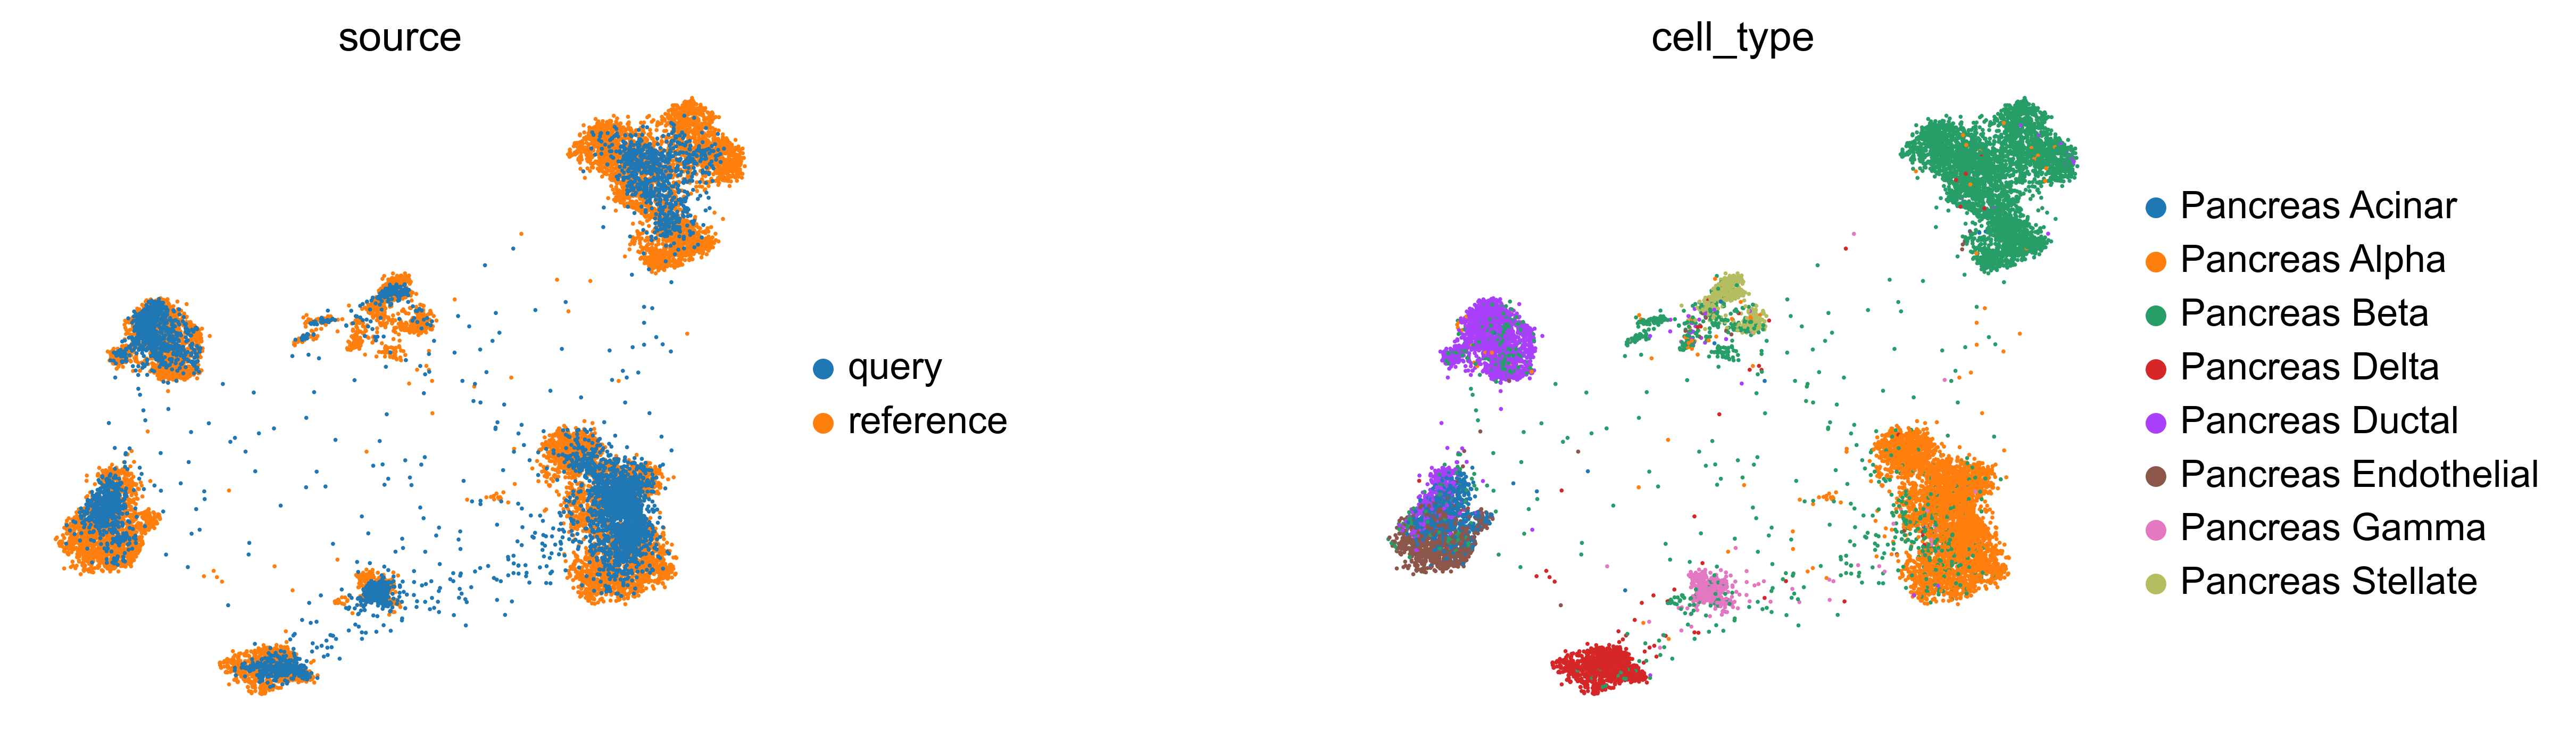

In [10]:
pp.umap_transform(udpate_reference=False)
display_umap(pp.full_adata, color=["source", "cell_type"])